# 赛马娘抽卡概率计算
## 公式
二项分布是离散概率分布，用于描述在固定次数的独立实验中，成功次数的概率分布，其中每次实验的成功概率是相同的。

二项分布的概率质量函数（probability mass function, PMF）由以下公式给出：

$ P(X = k) = C^k_n \cdot p^k \cdot (1-p)^{n-k}$

其中：
- \( P(X =k) \) 是恰好发生 \( k \) 次成功的概率。
- \( C(n, k) \) 是组合数，也即从 \( n \) 次实验中选择 \( k \) 次成功的方式数目，计算公式为 $( C^k_n = \frac{n!}{k!(n-k)!} )$。
- \( n \) 是实验的总次数。
- \( p \ 是每次实验成功的概率。
- \( k \) 是成功次数。

## 代码

In [1]:
# 二项分布概率计算
import math
# 假设每次实验成功的概率是p，实验次数是n，求成功k次的概率
def binomial_distribution(n, k, p):
    # 计算组合数C(n, k)
    combination = math.comb(n, k)
    # 计算概率P(X = k)
    probability = combination * (p **k) * ((1 - p) ** (n - k))
    return probability

print(binomial_distribution(200, 1, 0.0075))


0.33532337654961586


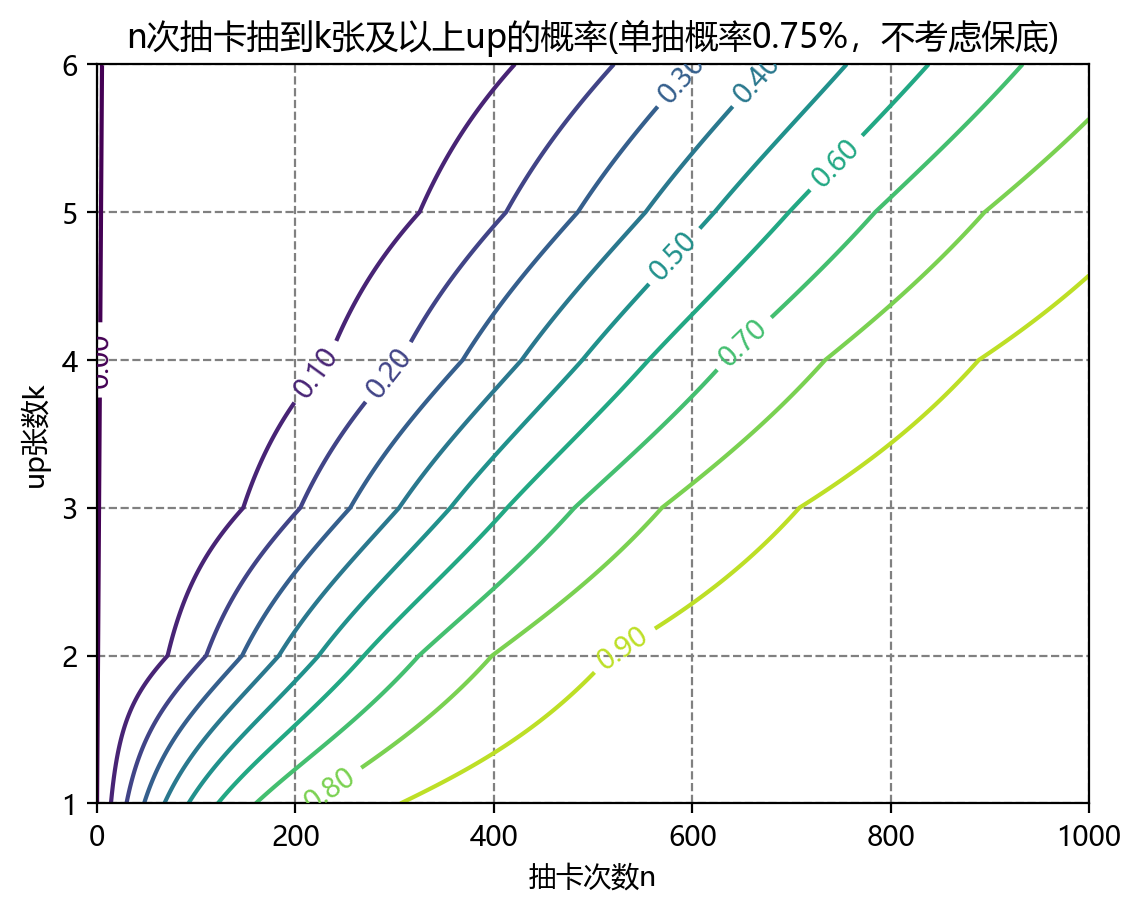

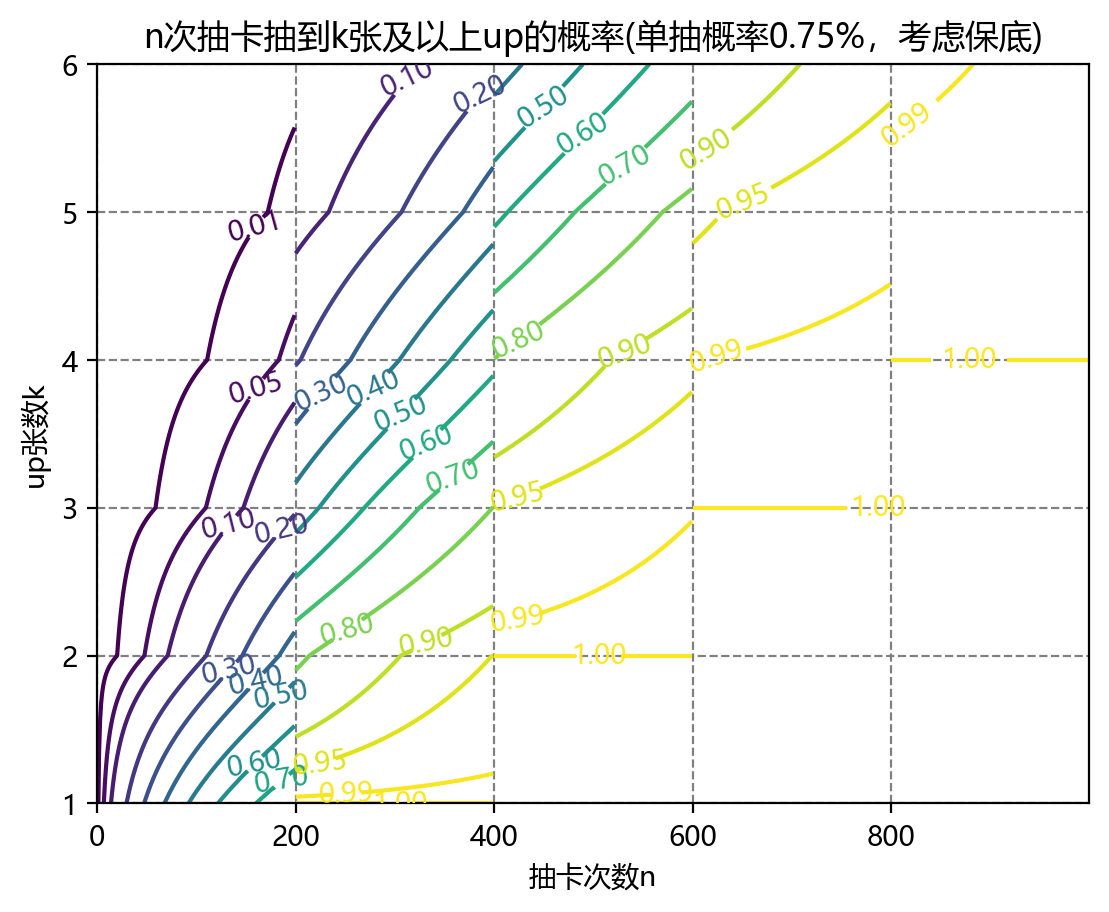

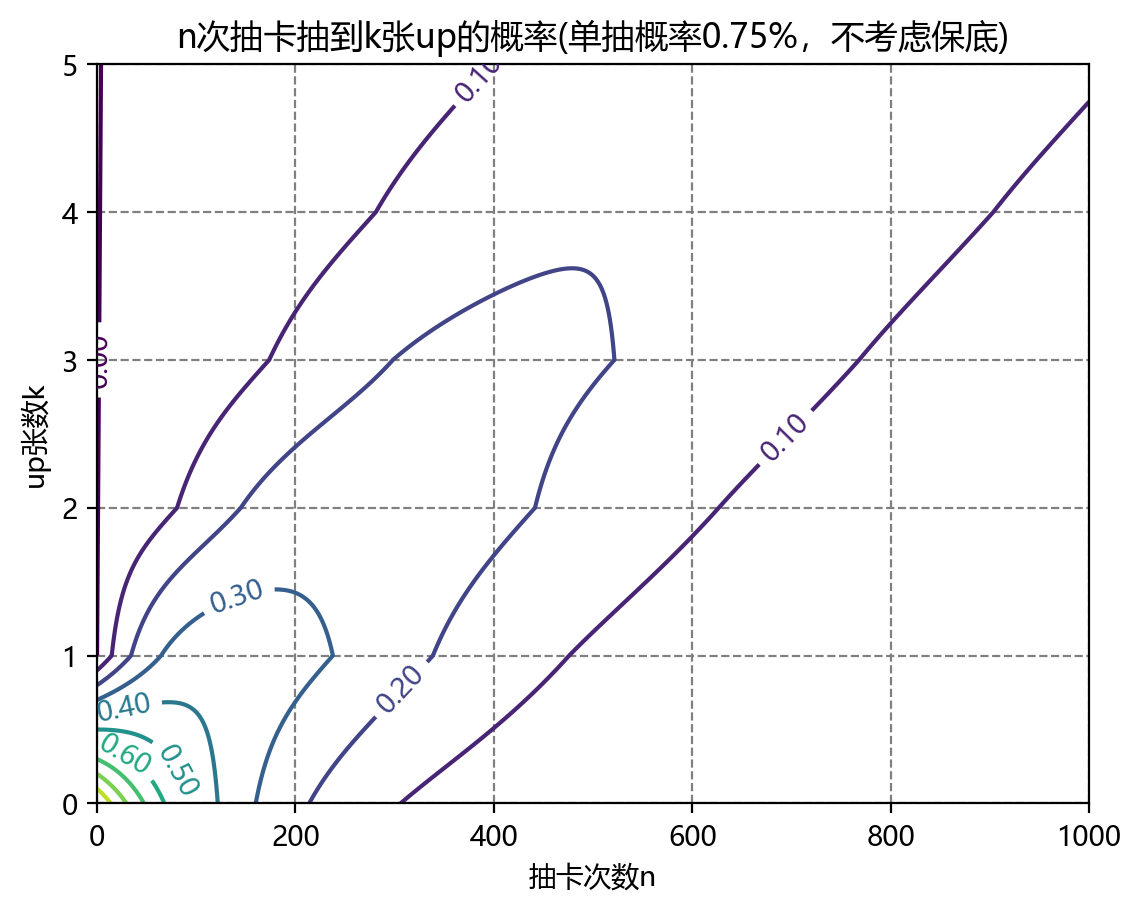

In [2]:
# up池版
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'# 高清图片
plt.rcParams['font.family'] = ['Microsoft YaHei']# 汉字

k=np.arange(0,6)# 设定up数k的范围
n=np.arange(0,1001)# 设定抽取次数n的范围
N,K=np.meshgrid(n,k)
P=np.empty_like(K)+0.0# 初始化

# 遍历所有设定的k，n，计算概率并储存在数组P中
for i in range(np.size(k)):
    for j in range(np.size(n)):
        P[i,j]=binomial_distribution(n[j], k[i], 0.0075)#n次抽卡抽到k张的概率
        
P_sum = P+0.0 # 初始化

# 通过P数组计算抽到k+1张及以上的概率数组
for i in range(np.size(k)-1):
    P_sum[i+1] += P_sum[i]# 抽到k张及以下的概率
P_success = 1-P_sum# 抽到k+1张及以上的概率

# 第一幅图，不考虑保底
fig, ax = plt.subplots()# 创建图窗
# 画等高线图
contour = ax.contour(N, K+1, P_success, levels=np.linspace(0, 1, 11))  # levels数组内的每个数对应一条等高线

# 格式化等高线的标签为小数点后2位
fmt = '%.2f'  
# 添加等高线标签
contour.clabel(fmt=fmt, manual=None)

ax.grid(True)  # 显示坐标网格
ax.grid(color='0.5', linestyle='--', linewidth=0.8)  # 设置网格线的颜色、样式和宽度

# 添加标题和标签
plt.title("n次抽卡抽到k张及以上up的概率(单抽概率0.75%，不考虑保底)")
plt.xlabel("抽卡次数n")
plt.ylabel("up张数k")
# 展示图片
plt.show()


# 第二幅图，考虑保底
fig, ax = plt.subplots()
# 将保底加入图中
for i in range(np.size(n)):
    j = int(i/200)# j表示第j个保底
    P_success[j:,i]=P_success[:int(np.size(k)-j),i]# k变为原有的k加上保底
    P_success[:j,i]=1.0# 获得保底的概率为1
# 分段画等高线
for j in range(int(np.size(n)/200)):
    i=j*200
    # 设置等高线范围levels_set
    levels_set = np.linspace(0, 1.2, 13)
    if i==0:
        levels_set = np.concatenate([np.array([0.01,0.05]),levels_set[1:]])
    if i>1:
        levels_set = np.insert(levels_set[:11],10,0.95)
        levels_set = np.insert(levels_set[:12],11,0.99)
    contour = ax.contour(N[:,i:i+200], K[:,i:i+200]+1, P_success[:,i:i+200], levels=levels_set)  
    fmt = '%.2f'  
    contour.clabel(fmt=fmt, manual=None)


ax.grid(True)  
ax.grid(color='0.5', linestyle='--', linewidth=0.8)  

plt.title("n次抽卡抽到k张及以上up的概率(单抽概率0.75%，考虑保底)")
plt.xlabel("抽卡次数n")
plt.ylabel("up张数k")
plt.show()


# 第三幅图，抽到k张的概率（不包含k张以上）
fig, ax = plt.subplots()
contour = ax.contour(N, K, P, levels=np.linspace(0, 1, 11))  


fmt = '%.2f'  
contour.clabel(fmt=fmt, manual=None)

ax.grid(True)  
ax.grid(color='0.5', linestyle='--', linewidth=0.8)  

plt.title("n次抽卡抽到k张up的概率(单抽概率0.75%，不考虑保底)")
plt.xlabel("抽卡次数n")
plt.ylabel("up张数k")
plt.show()

摸奖概率（低抽数）


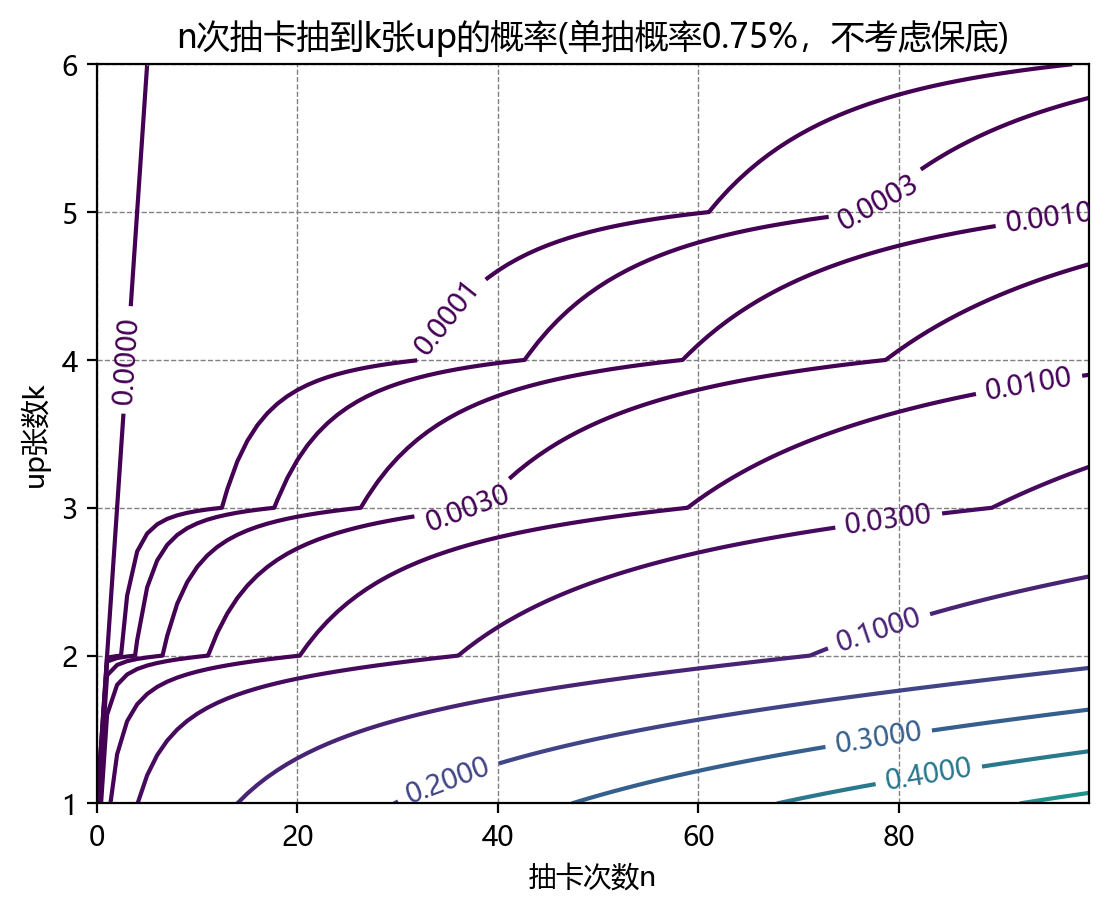

In [3]:
# 摸奖版，也可用于刷初始
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = ['Microsoft YaHei']

k=np.arange(0,6)
n=np.arange(0,100)
N,K=np.meshgrid(n,k)
P=np.empty_like(K)+0.0

for i in range(np.size(k)):
    for j in range(np.size(n)):
        P[i,j]=binomial_distribution(n[j], k[i], 0.0075)#n次抽卡抽到k张的概率
        
P_sum = P+0.0
for i in range(np.size(k)-1):
    P_sum[i+1] += P_sum[i]# 抽到k张及以下的概率
P_success = 1-P_sum# 抽到k+1张及以上的概率

# 创建等高线图
fig, ax = plt.subplots()
levels_set = np.linspace(0, 1.2, 13)
levels_set = np.insert(levels_set[:11],10,0.95)
levels_set = np.insert(levels_set[:12],11,0.99)
levels_set = np.concatenate([np.array([0.0,0.0001,0.0003,0.001,0.003,0.01,0.03]),levels_set[1:]])
contour = ax.contour(N, K+1, P_success, levels=levels_set)  # levels参数定义了等高线的级别

# 添加等高线标签
fmt = '%.4f'  # 格式化等高线的标签
contour.clabel(fmt=fmt, manual=None)

ax.grid(True)  # 显示横纵坐标网格
ax.grid(color='0.5', linestyle='--', linewidth=0.5)  # 设置网格线的颜色、样式和宽度

# 添加标题和标签
plt.title("n次抽卡抽到k张up的概率(单抽概率0.75%，不考虑保底)")
plt.xlabel("抽卡次数n")
plt.ylabel("up张数k")
plt.show()




出彩概率

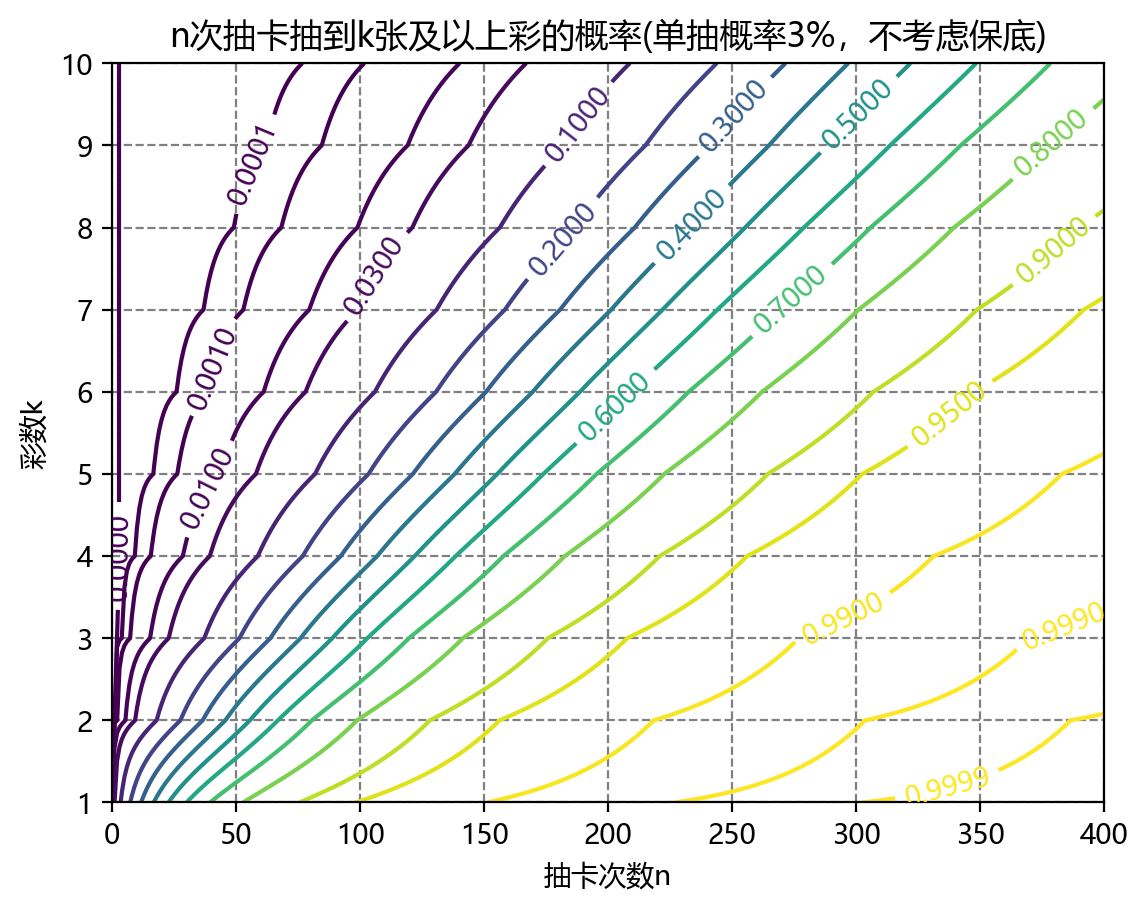

In [4]:
# 出彩版
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = ['Microsoft YaHei']

k=np.arange(0,10)
n=np.arange(0,401)
N,K=np.meshgrid(n,k)
P=np.empty_like(K)+0.0

for i in range(np.size(k)):
    for j in range(np.size(n)):
        P[i,j]=binomial_distribution(n[j], k[i], 0.03)#n次抽卡抽到k张的概率
        
P_sum = P+0.0
for i in range(np.size(k)-1):
    P_sum[i+1] += P_sum[i]# 抽到k张及以下的概率
P_success = 1-P_sum# 抽到k+1张及以上的概率

# 创建等高线图
fig, ax = plt.subplots()
levels_set = np.linspace(0, 1.2, 13)
levels_set = np.insert(levels_set[:11],10,0.95)
levels_set = np.insert(levels_set[:12],11,0.99)
levels_set = np.insert(levels_set[:13],12,0.999)
levels_set = np.insert(levels_set[:14],13,0.9999)
levels_set = np.concatenate([np.array([0.0,0.0001,0.001,0.01,0.03]),levels_set[1:]])
contour = ax.contour(N, K+1, P_success, levels_set)  # levels参数定义了等高线的级别

# 添加等高线标签
fmt = '%.4f'  # 格式化等高线的标签
contour.clabel(fmt=fmt, manual=None)

ax.grid(True)  # 显示横纵坐标网格
ax.grid(color='0.5', linestyle='--', linewidth=0.8)  # 设置网格线的颜色、样式和宽度

# 添加标题和标签
plt.title("n次抽卡抽到k张及以上彩的概率(单抽概率3%，不考虑保底)")
plt.xlabel("抽卡次数n")
plt.ylabel("彩数k")
plt.show()




## 模拟验证
数值模拟，用于验证前面计算的正确性。经过验证前面的计算是没有问题的。

In [37]:
#进行n次实验，每次m抽。n次实验中有a次抽到b张及以上。每抽抽到的概率为p。
import random

a=0
n=10000
m=600
b=4
p=0.0075
for i in range(n):
    # 生成一个包含m个随机数的列表，表示m抽
    random_numbers = [random.random() for _ in range(m)]

    # 抽到的张数
    getnum = len([num for num in random_numbers if num < p]) #/ len(random_numbers)
    
    if getnum>=b:
        a+=1
        
print(a/n)#抽到b张及以上的概率



0.6675
